### Задание

При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма: strategy, maxiter, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.

In [1]:
import numpy as np
from scipy.optimize import differential_evolution

In [2]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2763
     nit: 89
 success: True
       x: array([0., 0.])

strategy - стратегия ()
maxiter - кол-во поколений
popsize - размер популяции
tol - характеристика остановки оптимизации
mutation - сила мутации
recombination - вероятность мутации
updating - характиристика обновления лучшего вектор


In [56]:
import pylab

#### Параметр strategy

In [58]:
nint_strategy=[]
fun_strategy=[]
strategies=['best1bin','best1exp','rand1exp','randtobest1exp','currenttobest1exp','best2exp','rand2exp',
          'randtobest1bin','currenttobest1bin','best2bin','rand2bin','rand1bin']

In [59]:
for i in strategies:
    result = differential_evolution(ackley, bounds, seed=42, strategy=i)
    nint_strategy.append(result.nit)
    fun_strategy.append(result.fun)

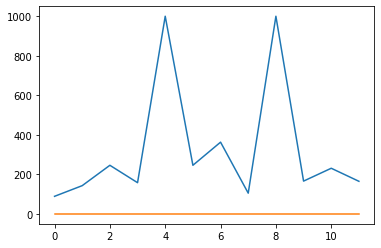

In [72]:
pylab.plot(nint_strategy)
pylab.plot(fun_strategy)

#### Параметр maxiter

In [61]:
nint_maxiter=[]
fun_maxiter=[]
maxiters=[i for i in range(1,50)]

In [62]:
for i in maxiters:
    result = differential_evolution(ackley, bounds, seed=42, maxiter=i)
    nint_maxiter.append(result.nit)
    fun_maxiter.append(result.fun)

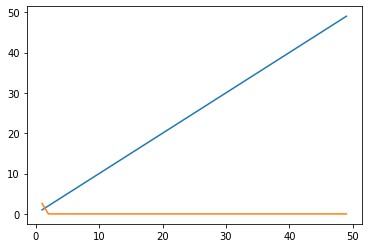

In [64]:
pylab.plot(maxiters,nint_maxiter)
pylab.plot(maxiters,fun_maxiter)

#### Параметр popsize

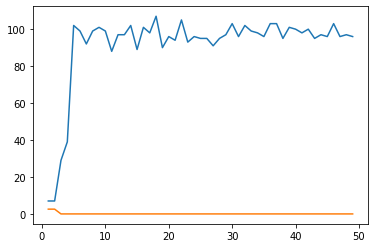

In [71]:
nint_popsize=[]
fun_popsize=[]
popsizes=[i for i in range(1,50)]
for i in popsizes:
    result = differential_evolution(ackley, bounds, seed=42, popsize=i)
    nint_popsize.append(result.nit)
    fun_popsize.append(result.fun)
pylab.plot(popsizes,nint_popsize)
pylab.plot(popsizes,fun_popsize)

#### Параметр tol

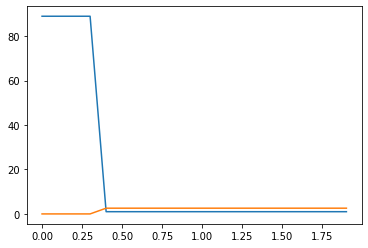

In [111]:
nint_tol=[]
fun_tol=[]
tols=np.arange(0, 2, 0.1)
for i in tols:
    result = differential_evolution(ackley, bounds, seed=42, tol=i)
    nint_tol.append(result.nit)
    fun_tol.append(result.fun)
pylab.plot(tols,nint_tol)
pylab.plot(tols,fun_tol)

#### Параметр mutation

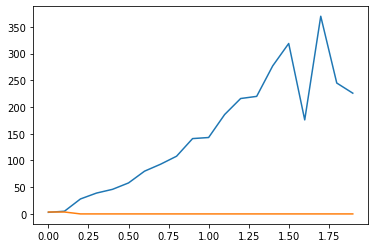

In [88]:
nint_mutation=[]
fun_mutation=[]
mutations=np.arange(0, 2, 0.1)
for i in mutations:
    result = differential_evolution(ackley, bounds, seed=42, mutation=i)
    nint_mutation.append(result.nit)
    fun_mutation.append(result.fun)
pylab.plot(mutations,nint_mutation)
pylab.plot(mutations,fun_mutation)

#### Параметр recombination

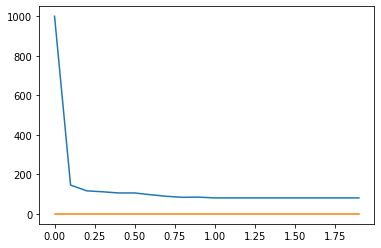

In [86]:
nint_recombination=[]
fun_recombination=[]
recombinations=np.arange(0, 2, 0.1)
for i in recombinations:
    result = differential_evolution(ackley, bounds, seed=42, recombination=i)
    nint_recombination.append(result.nit)
    fun_recombination.append(result.fun)
pylab.plot(recombinations,nint_recombination)
pylab.plot(recombinations,fun_recombination)

#### Параметр updating

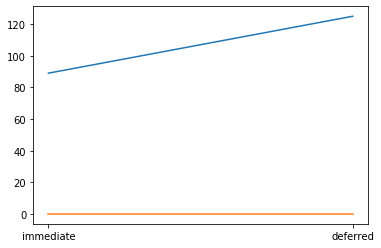

In [99]:
nint_updating=[]
fun_updating=[]
updatings=['immediate','deferred']
for i in updatings:
    result = differential_evolution(ackley, bounds, seed=42, updating=i)
    nint_updating.append(result.nit)
    fun_updating.append(result.fun)
pylab.plot(updatings,nint_updating)
pylab.plot(updatings,fun_updating)

#### Поиск лучшего решения по всем параметрам

Оставим только параметры с хорошим результатом.

In [115]:
strategies=['best1bin','randtobest1bin']
maxiters=[i for i in range(1,5)]
popsizes=[i for i in range(1,5)]
tols=np.arange(0, 0.5, 0.01)
mutations=np.arange(0, 2, 0.4)
recombinations=np.arange(0, 0.1, 0.02)
updatings=['immediate','deferred']

In [116]:
nit_min=1000000000

In [117]:
for strategy in strategies:
    for maxiter in maxiters:
        for popsize in popsizes:
            for tol in tols:
                for mutation in mutations:
                    for recombination in recombinations:
                        for updating in updatings:
                            result = differential_evolution(ackley, 
                                bounds, 
                                seed=42, 
                                strategy=strategy,
                                maxiter=maxiter,
                                popsize=popsize,
                                tol=tol,
                                mutation=mutation,
                                recombination=recombination,
                                updating=updating)
                            if result.nit<=nit_min:
                                nit_min=result.nit
                                fun_min=result.fun
                                strategy_min=strategy
                                maxiter_min=maxiter
                                popsize_min=popsize
                                tol_min=tol
                                mutation_min=mutation
                                recombination_min=recombination
                                updating_min=updating

In [118]:
print(nit_min,fun_min,strategy_min,maxiter_min,popsize_min,tol_min,mutation_min,recombination_min,updating_min)

1 1.994666165572312e-08 randtobest1bin 4 4 0.49 1.6 0.08 deferred


In [ ]:
Т.е. уже на первой итерации можно найти минимум.